# Lifestyle, and it's Correlation with Sleeping Disorders

This project investigates the relationship between sleep health, lifestyle factors, and sleep disorders using a comprehensive dataset of health metrics. The analysis aims to identify patterns and correlations between various personal attributes (such as age, gender, occupation) and health measurements (including sleep duration, quality, physical activity, and stress levels) to predict the presence and type of sleep disorders. By applying data preprocessing, exploratory analysis, and machine learning techniques, the research seeks to uncover insights that could potentially inform health interventions and improve understanding of how lifestyle choices impact sleep health. The ultimate goal is to build a predictive model that can accurately classify individuals into different sleep disorder categories based on their health and lifestyle data.



Vetrivel Santhalingam: Summary's for plots and conclusion and insights sections. Sections E & F



Trinity Martin: Visualization, Final Report Tutorial Creation. Section F & G


Fadeela Ali: Result Analysis, Project Idea. Section A & F


adedapo oyewole-magnus: Dataset Curation and Preprocessing. Section: B


Alexander Morgan: ML Training, Data Cleaning. Sections: B & D

**Dataset**: **Sleep Health and Lifestyle Dataset** By Laksika Tharmalingam https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

**Dataset Overview**: The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

In [ ]:
try:
    data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Sleep_health_and_lifestyle_dataset.csv' not found.")
    # Exit or handle error appropriately if file not found
    data = None # Set data to None to prevent further errors

Dataset loaded successfully.


# Checking Data

Here we are going through the process of checking and cleaning the data, replacing any NaN values with the needed adjustments

In [ ]:
if data is not None:
    # --- Initial Inspection ---
    print("\nDataset Information:")
    data.info()

    print("\nChecking for missing values:")
    print(data.isnull().sum())
    data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
    data['BMI Category'] = data['BMI Category'].replace('Normal', 'Normal Weight')

    # ---Handle Potential Data Entry Issues ---
    # Check for inconsistencies like 'None' string vs actual NaN for Sleep Disorder
    if 'Sleep Disorder' in data.columns:
        print("\nUnique values in 'Sleep Disorder' before handling:")
        print(data['Sleep Disorder'].unique())


    # --- Define Features (X) and Target (y) ---
    if 'Sleep Disorder' in data.columns:
        X = data.drop('Sleep Disorder', axis=1)
        y = data['Sleep Disorder']
        print("\nFeatures (X) and Target (y) defined.")
    else:
        print("\nError: 'Sleep Disorder' column not found. Cannot proceed.")
        X, y = None, None


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


We can see here that the data its self is quite clean, all that was needed to be changed were the sleep disorder NaN values, of which we just changed to None.

**Preprocessing Pipeline Overview**  
1. Encode the target variable (“Sleep Disorder”) into numeric labels  
2. Identify and clean feature types (drop the `Person ID` column)  
3. One‑hot encode all categorical features  
4. Split the data into 80% training and 20% testing sets (stratified)  
5. Apply StandardScaler to the original numerical columns

In the preprocessing phase, the code identifies and separates numerical and categorical features, excludes the 'Person ID' as it's merely an identifier, and prepares the target variable 'Sleep Disorder' using label encoding. Categorical features undergo one-hot encoding to make them suitable for machine learning, while numerical features are standardized using StandardScaler. The data is strategically split into training (80%) and testing (20%) sets with stratification to maintain class proportions.


In [ ]:

if X is not None: # Only proceed if X and y were defined
    # --- Encode Target Variable ---
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)
    print("\nTarget variable 'Sleep Disorder' encoded.")
    # Store mapping for later interpretation
    label_mapping = {index: label for index, label in enumerate(encoder.classes_)}
    print("Label Encoding Mapping:", label_mapping)

    # --- Identify Categorical and Numerical Features ---
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

    print("\nNumerical Features:", numerical_features)
    print("Categorical Features:", categorical_features)
    # We need to remove 'Person ID' as it's just an identifier
    if 'Person ID' in numerical_features:
        numerical_features.remove('Person ID')
        X = X.drop('Person ID', axis=1) # Drop ID from features
        print("'Person ID' removed from features.")


    # --- Preprocessing - One-Hot Encode Categorical Features ---
    # Using get_dummies for simplicity here
    X_processed = pd.get_dummies(X, columns=categorical_features, drop_first=False) # drop_first=True can help reduce multicollinearity if needed
    print("\nCategorical features One-Hot Encoded.")
    print("Shape of processed features (X_processed):", X_processed.shape)
    print("Columns after One-Hot Encoding:", X_processed.columns.tolist())

    # Update numerical features list after potential ID drop and before scaling
    numerical_features_processed = X_processed.select_dtypes(include=np.number).columns.tolist()
    # Ensure only original numerical features are scaled, not the new dummy ones
    numerical_features_to_scale = [col for col in numerical_features if col in X_processed.columns]


    # --- Split Data *BEFORE* Scaling ---
    x_train, x_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Stratify ensures class proportion is maintained
    print(f"\nData split into training ({len(x_train)} samples) and testing ({len(x_test)} samples) sets.")

    # --- Scale Numerical Features *AFTER* Splitting ---
    scaler = StandardScaler()
    # Scale only the original numerical columns that still exist
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()
    x_train_scaled[numerical_features_to_scale] = scaler.fit_transform(x_train[numerical_features_to_scale])
    x_test_scaled[numerical_features_to_scale] = scaler.transform(x_test[numerical_features_to_scale]) # Use transform only on test set

    print("\nNumerical features scaled using StandardScaler.")
    print("Preprocessing complete.")
else:
    print("\nSkipping Preprocessing: X or y is None (likely due to data loading issues).")



Target variable 'Sleep Disorder' encoded.
Label Encoding Mapping: {0: 'Insomnia', 1: 'None', 2: 'Sleep Apnea'}

Numerical Features: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical Features: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
'Person ID' removed from features.

Categorical features One-Hot Encoded.
Shape of processed features (X_processed): (374, 48)
Columns after One-Hot Encoding: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Gender_Female', 'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweigh

## Exploratory Data Analysis

The exploratory data analysis section generates comprehensive summary statistics and visualizations to understand feature distributions. It creates countplots for categorical variables and examines relationships between sleep duration and sleep disorders through boxplots. The analysis also explores gender distribution across different sleep disorder categories to identify potential patterns or disparities.


In [ ]:
if data is not None:
    print("\n--- Phase B: Data Exploration ---")

    # ---Summary Statistics ---
    print("\nSummary Statistics for Numerical Features:")
    # Use original numerical features list (excluding ID if removed)
    original_numerical_features = [col for col in data.select_dtypes(include=np.number).columns if col != 'Person ID']
    print(data[original_numerical_features].describe())

    print("\nSummary Statistics for Categorical Features:")
    original_categorical_features = data.select_dtypes(exclude=np.number).columns.tolist()
    print(data[original_categorical_features].describe())



--- Phase B: Data Exploration ---

Summary Statistics for Numerical Features:
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min     


Exploring distributions of key categorical features:


<ipython-input-18-baab2df82e59>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, ax=axes[i], palette='viridis', order = data[feature].value_counts().index[:15]) # Limit to top 15 for readability if high cardinality
<ipython-input-18-baab2df82e59>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, ax=axes[i], palette='viridis', order = data[feature].value_counts().index[:15]) # Limit to top 15 for readability if high cardinality
<ipython-input-18-baab2df82e59>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


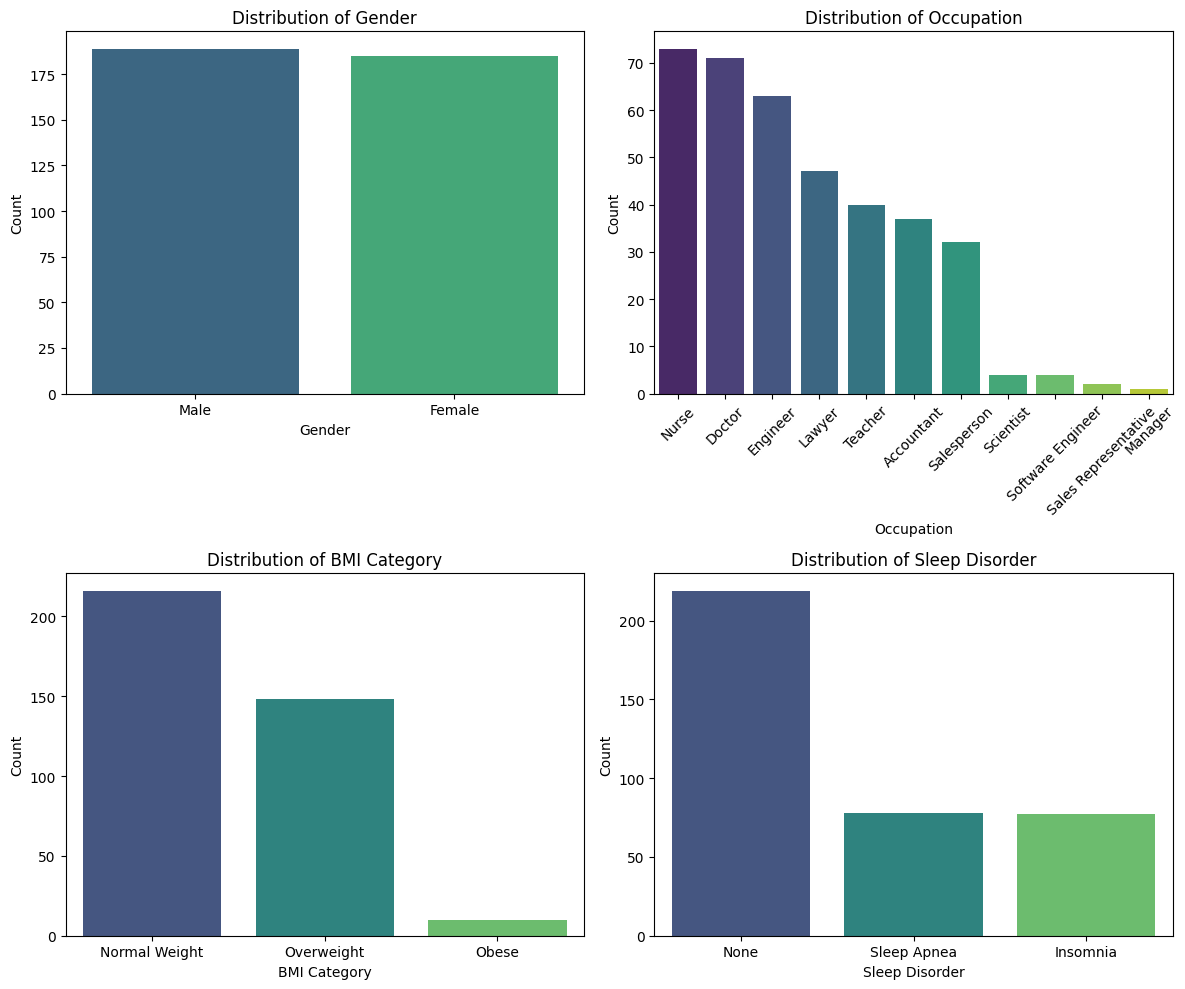

In [ ]:


if data is not None:
    # --- Categorical Feature Distributions ---
    print("\nExploring distributions of key categorical features:")
    # Select only original categorical features that exist in the dataframe
    categorical_to_plot = [col for col in original_categorical_features if col in data.columns and col != 'Blood Pressure'] # Exclude Blood Pressure for now due to high cardinality

    if categorical_to_plot:
        num_cat_features = len(categorical_to_plot)
        # Adjust layout dynamically - aiming for 2 columns
        ncols = 2
        nrows = (num_cat_features + ncols - 1) // ncols # Calculate rows needed
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))
        axes = axes.flatten() # Flatten to easily iterate

        for i, feature in enumerate(categorical_to_plot):
            sns.countplot(data=data, x=feature, ax=axes[i], palette='viridis', order = data[feature].value_counts().index[:15]) # Limit to top 15 for readability if high cardinality
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            # Rotate labels if needed, especially for 'Occupation'
            if data[feature].nunique() > 5: # Rotate if more than 5 unique values
                 axes[i].tick_params(axis='x', rotation=45)

        # Hide any unused subplots if the number of features isn't a multiple of ncols
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("No suitable categorical features found for distribution plots.")

else:
    print("\nSkipping Categorical Distributions: Data is None.")


So what does this plot show?

The bar charts for each category show which groups are most common in our sample.  
- **Sleep Disorder**: Most participants don't have a sleep disorder, while sleep apnea and insomnia are equal at second and third respectively in the sample.  
- **Gender**: Balanced split between genders means there won't be one group over represented.
- **BMI**: The BMI spread roughly matches the population of these weight classes in the Untited States
- **Occuputation**: The sample heavily skews towards jobs that would require you to work late or work overnight shifts, which must be taken into account.

In [ ]:
if 'data' in locals() and data is not None and 'Sleep Disorder' in data.columns:
    target_distribution = data['Sleep Disorder'].value_counts()
    print("Target distribution calculated. Categories (index):", target_distribution.index.tolist())
    print("Counts:\n", target_distribution)
else:
    print("Error: 'data' DataFrame is not defined, is None, or 'Sleep Disorder' column is missing.")

Target distribution calculated. Categories (index): ['None', 'Sleep Apnea', 'Insomnia']
Counts:
 Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64



Exploring 'Sleep Duration' across 'Sleep Disorder' categories:


<ipython-input-20-3a046aa16843>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Sleep Disorder', y='Sleep Duration', order=target_distribution.index, palette='viridis') # Order by frequency


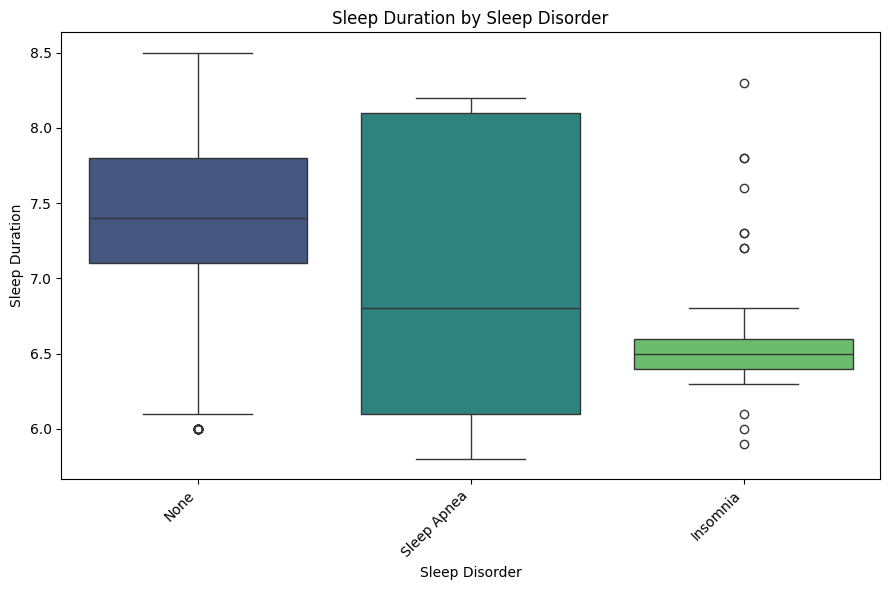

In [ ]:
if 'data' in locals() and data is not None and 'Sleep Disorder' in data.columns:
      target_distribution = data['Sleep Disorder'].value_counts()
      print("\nExploring 'Sleep Duration' across 'Sleep Disorder' categories:")
      plt.figure(figsize=(9, 6))
      sns.boxplot(data=data, x='Sleep Disorder', y='Sleep Duration', order=target_distribution.index, palette='viridis') # Order by frequency
      plt.title('Sleep Duration by Sleep Disorder')
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()


So what does this plot show?

The boxplot highlights the following:
- Participants without a sleep disorder sleep longest on average
- Insomniacs sleep the least median duration of sleep and higher variation in their sleeping habits
- Sleep Apnea falls inbetween the two which may show that the disorder severity is probably related to sleep duration


Exploring 'Gender' distribution across 'Sleep Disorder' categories:


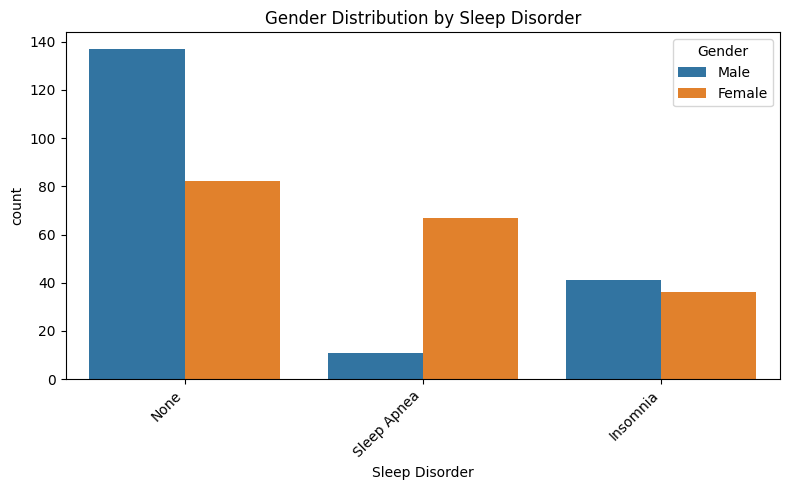

In [ ]:
 # Categorical vs. Target
 if data is not None:
    if 'Gender' in data.columns and 'Sleep Disorder' in data.columns:
      print("\nExploring 'Gender' distribution across 'Sleep Disorder' categories:")
      plt.figure(figsize=(8, 5))
      sns.countplot(data=data, x='Sleep Disorder', hue='Gender', order=target_distribution.index)
      plt.title('Gender Distribution by Sleep Disorder')
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()

So what does this plot show?

The countplot reveals that:
- Males report insomnia slightly more than females
- Females have significantly more cases of sleep apnea than males
- Far more males report no sleep issues compared to females

However, this can be subject to impacts such as male pride, etc. which makes it difficult to quanitfy these results without considering such impacts.

## Correlation Matrix of Features


Calculating Correlation Matrix for Numerical Features:


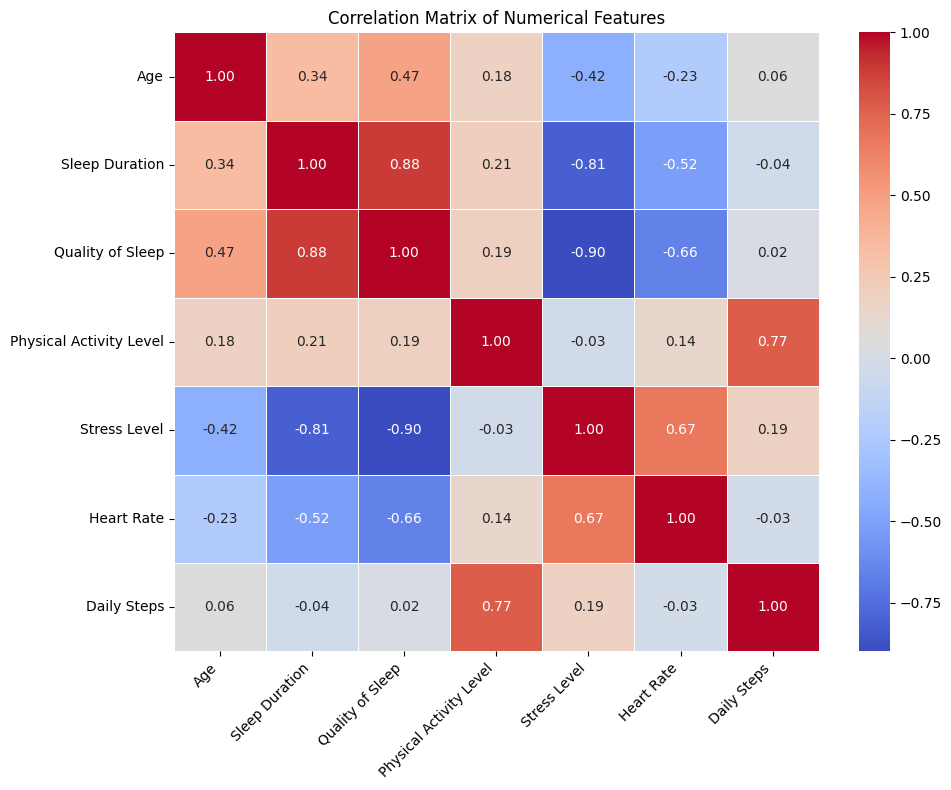

In [ ]:
if data is not None:
    # --- Correlation Matrix for Numerical Features ---
    print("\nCalculating Correlation Matrix for Numerical Features:")
    if original_numerical_features:
      correlation_matrix = data[original_numerical_features].corr()
      plt.figure(figsize=(10, 8))
      sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
      plt.title('Correlation Matrix of Numerical Features')
      plt.xticks(rotation=45, ha='right')
      plt.yticks(rotation=0)
      plt.tight_layout()
      plt.show()
    else:
        print("No numerical features found for correlation matrix.")

So what does this plot show?

The heatmap matrix shows a couple key correlations:
- **Sleep Duration is correlated to Sleep Quality** - it is very positive meaning that people who report longer sleep duration report higher sleep quality
- **Stress level is correlated to Sleep Quality & Duration** - People who are encoutering high stress day to day report lowering sleep quality and duration, indicating that stress is very likely linked to poor sleep. Especially because sleep duration has a high negative correlation with duration, meaning more sleep = less stress, especially quality wise.
- **Daily Steps and Physical activity do not show correlation to sleep quality** - Some people suggest getting a workout in before sleep to improve their sleep quality, however, the correlation as reported by the data is negligible.
- **Sleep quality and duration has a moderately negative impact on heart rate** - this means that the data shows lower heart rate in people with lower sleep, likely due to lower stress levels.

# ML Training and Testing

## Decision Tree Classifier
We chose a classification algorithm because of its ability to predict a label based off of all the input data

The machine learning section implements a Decision Tree Classifier to predict sleep disorders based on the processed features. The model is trained on the scaled training data and evaluated on both training and testing sets to assess performance and check for overfitting. Evaluation metrics include accuracy, a detailed classification report, and a confusion matrix. Additionally, feature importance analysis reveals which factors most strongly influence sleep disorder prediction.


--- Phase C: ML Training and Testing ---
Decision Tree Classifier model trained on scaled training data.
Predictions made on training and testing sets.

Training Accuracy: 0.9264
Testing Accuracy: 0.9467

Classification Report (Testing Data):
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
        None       1.00      0.95      0.98        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.95        75
   macro avg       0.92      0.94      0.93        75
weighted avg       0.95      0.95      0.95        75


Confusion Matrix (Testing Data):


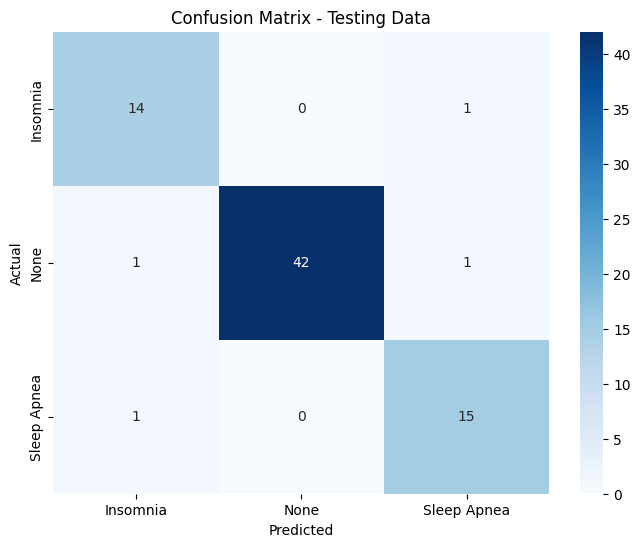

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns # Needed for plotting
from sklearn.tree import plot_tree

if 'y_test' in locals() and 'x_test_scaled' in locals(): # Check if data splitting and scaling occurred
    print("\n--- Phase C: ML Training and Testing ---")

    # --- Initialize and Train the Model (Decision Tree Classifier) ---
    # Using scaled training data for this model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train_scaled, y_train) # Train on scaled training data
    print("Decision Tree Classifier model trained on scaled training data.")

    # --- Make Predictions ---
    y_train_pred = model.predict(x_train_scaled) # Predictions on training data
    y_test_pred = model.predict(x_test_scaled)   # Predictions on scaled test data
    print("Predictions made on training and testing sets.")

    # --- Evaluate the Model ---
    # Calculate accuracy for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    # --- Classification Report ---
    print("\nClassification Report (Testing Data):")
    # Ensure target_names are correctly mapped from y_encoded if encoder is available
    class_names = [str(cls) for cls in encoder.classes_] if 'encoder' in locals() else None
    print(classification_report(y_test, y_test_pred, target_names=class_names))

    # --- Confusion Matrix ---
    print("\nConfusion Matrix (Testing Data):")
    cm = confusion_matrix(y_test, y_test_pred)
    # Display the confusion matrix using a heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Testing Data')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("\nSkipping ML Training and Testing: Data not split or scaled yet (y_test or x_test_scaled not found). Run preprocessing cell first.")


After Training and Testing the Model we can see that it performing very well across the board, The Precision(measures the fraction of correct positive predictions for each class), Recall(measures the fraction of actual positives correctly identified), and F1-Score(is the harmonic mean of precision and recall) are all high!




### **In the Confusion Matrix:**


Insomnia: 14 correctly classified, 1 mislabeled as Sleep Apnea

None: 42 correctly classified, 1 mislabeled as Insomnia, 1 as Sleep Apnea

Sleep Apnea: 15 correctly classified, 1 mislabeled as Insomnia

Out of 75 test cases, only 3 were misclassified, showing that the model generalizes very well across all three categories.

## Visulization of the Decision Tree


Visualizing the Decision Tree (limited depth for readability):


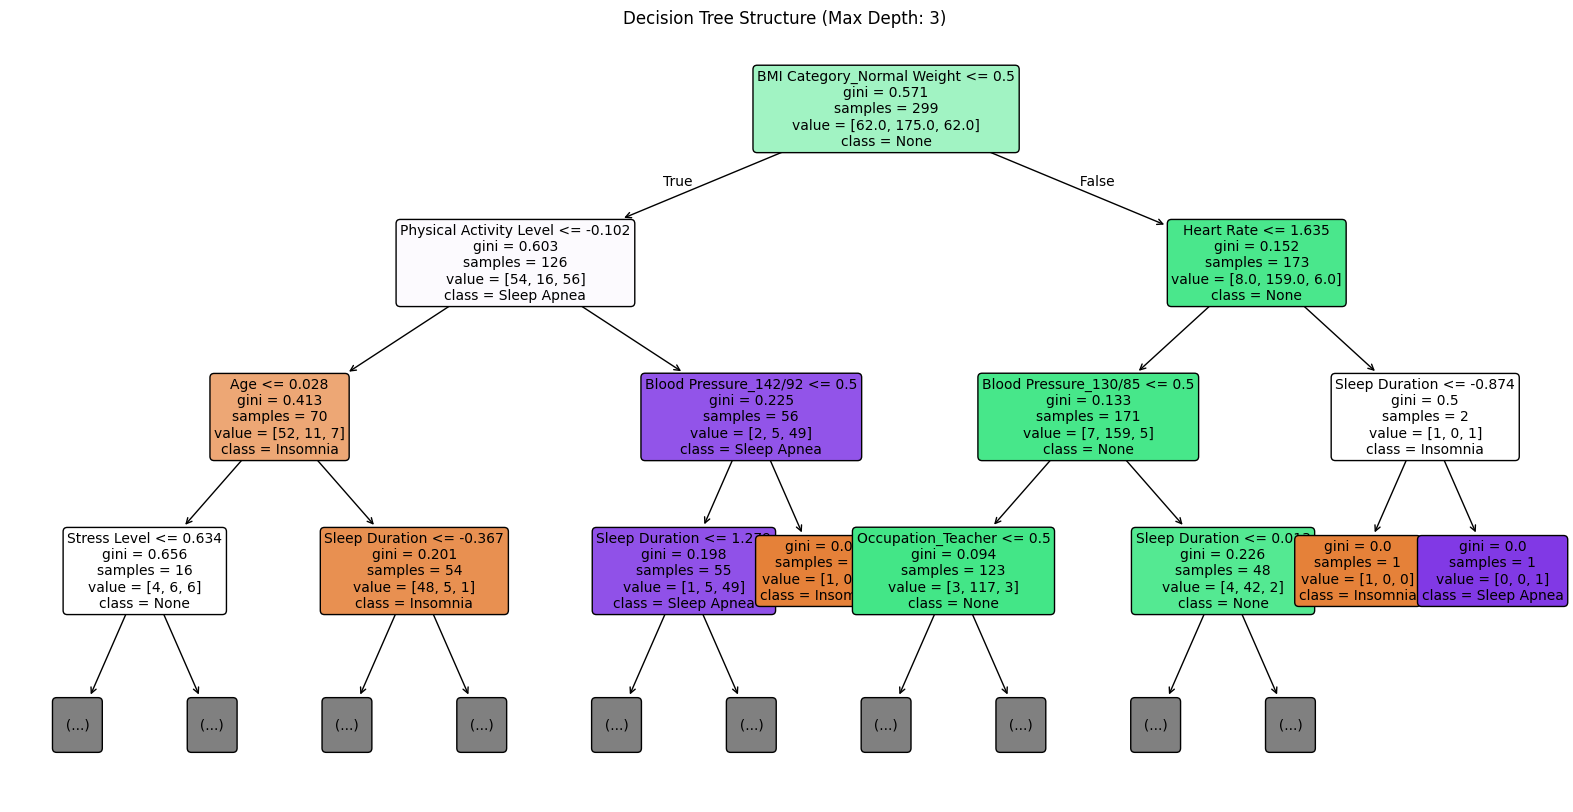

In [ ]:
# --- Visualize the Decision Tree ---
print("\nVisualizing the Decision Tree (limited depth for readability):")
plt.figure(figsize=(20,10)) # Adjust figure size as needed
# Ensure plot_tree is imported if not already: from sklearn.tree import plot_tree

# Get feature names from x_train_scaled (assuming it's a DataFrame)
feature_names = x_train_scaled.columns

plot_tree(model,
            filled=True,
            rounded=True,
            class_names=class_names,
            feature_names=feature_names,
            max_depth=3, # Limiting depth to 5 for initial visualization
            fontsize=10)
plt.title('Decision Tree Structure (Max Depth: 3)')
plt.show()

As we can see here the tree reinforces that weight status + activity are the primary levers, with heart rate, blood pressure, and sleep duration as critical secondary checks for distinguishing between no disorder, insomnia, and apnea.


Feature Importances:
                            feature  importance
20       BMI Category_Normal Weight    0.497429
3           Physical Activity Level    0.249206
0                               Age    0.085717
1                    Sleep Duration    0.052915
4                      Stress Level    0.044691
5                        Heart Rate    0.018581
15  Occupation_Sales Representative    0.013252
47            Blood Pressure_142/92    0.012570
8                       Gender_Male    0.010327
19               Occupation_Teacher    0.006399


<ipython-input-25-0cf5156bfabb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')


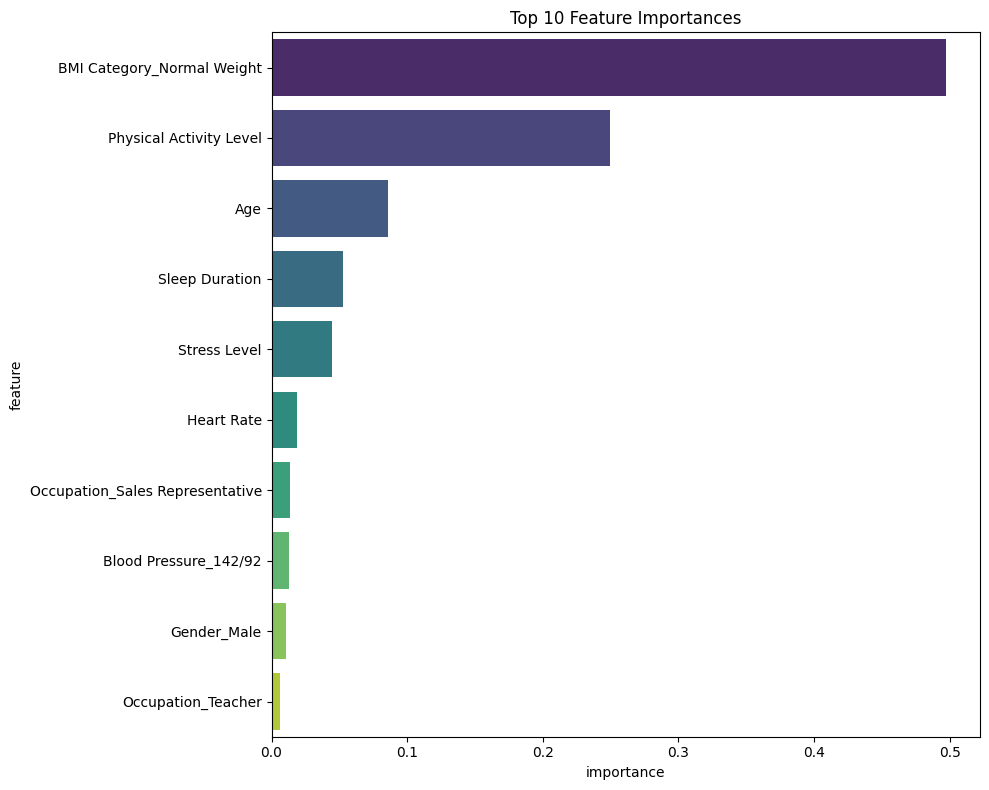

In [ ]:
# --- Feature Importance (for tree-based models like Decision Tree) ---
if hasattr(model, 'feature_importances_'):
    print("\nFeature Importances:")
    importances = model.feature_importances_
    # Get feature names from x_train_scaled (which should be a DataFrame)
    feature_names = x_train_scaled.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    print(feature_importance_df.head(10)) # Display top 10 features

    plt.figure(figsize=(10, 8))
    # Added palette='viridis' here
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()

Looking at this graph, we can see that if you were to collect or prioritize just a handful of features in a lean screening model, focus first on BMI category and physical activity, then on age, sleep duration, and stress. The remaining vitals and demographics add incremental gains but aren’t nearly as critical. This matches with our Decision Tree


ROC Curve and AUC for each class (One-vs-Rest):


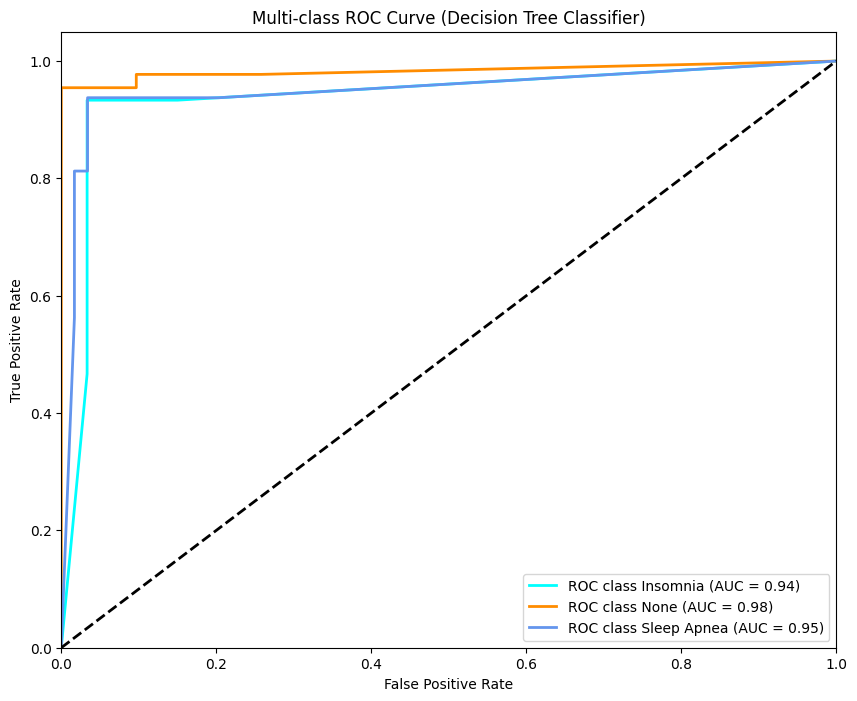

In [ ]:
# --- ROC Curve and AUC ---
print("\nROC Curve and AUC for each class (One-vs-Rest):")
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


y_test_binarized = label_binarize(y_test, classes=np.arange(len(encoder.classes_)))
n_classes = y_test_binarized.shape[1]

# Get prediction probabilities from the trained model
y_score = model.predict_proba(x_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']) # Add more if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC class {0} (AUC = {1:0.2f})'
                ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Dashed diagonal line (no skill classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Decision Tree Classifier)')
plt.legend(loc="lower right")
plt.show()

We can see that from our ROC curve and AUC values that our model had fantastic performance overall as the top left curve signifies a heavy pointer towards true positive tests which affirm our 90%+ accuracy score. This coupled with the high AUC scores of .94+ also affirms the strong performance of this model!

# Insights and Conclusions

For someone with no prior knowledge of the topic, this notebook will lay out a clear foundation on how sleep can be impacted by things like disorders, gender, lifestyle and other variables.  We can also visualize this with graphs as we progress showing the reader the data in small pieces that are easily digestible. We can disprove and correlate certain variables to predict whether or not someone will get good, high quality sleep based on these variables with a simple decision tree model.

For a reader well versed in sleep science, the notebook will provide quantitative evidence that will enhance their understanding of sleep science. We do this by using good data, in very detailed graphs that will help strengthen their understanding of correlating variables in sleep quality and duration, and our model can help them make decisions on whether or not someone will have good sleep before it becomes an issue.